In [1]:
import lightgbm as lgb
from lightgbm import plot_tree
import matplotlib.pyplot as plt
import os
import pandas as pd
import re

False Negative Model
---

<Figure size 2000x1000 with 0 Axes>

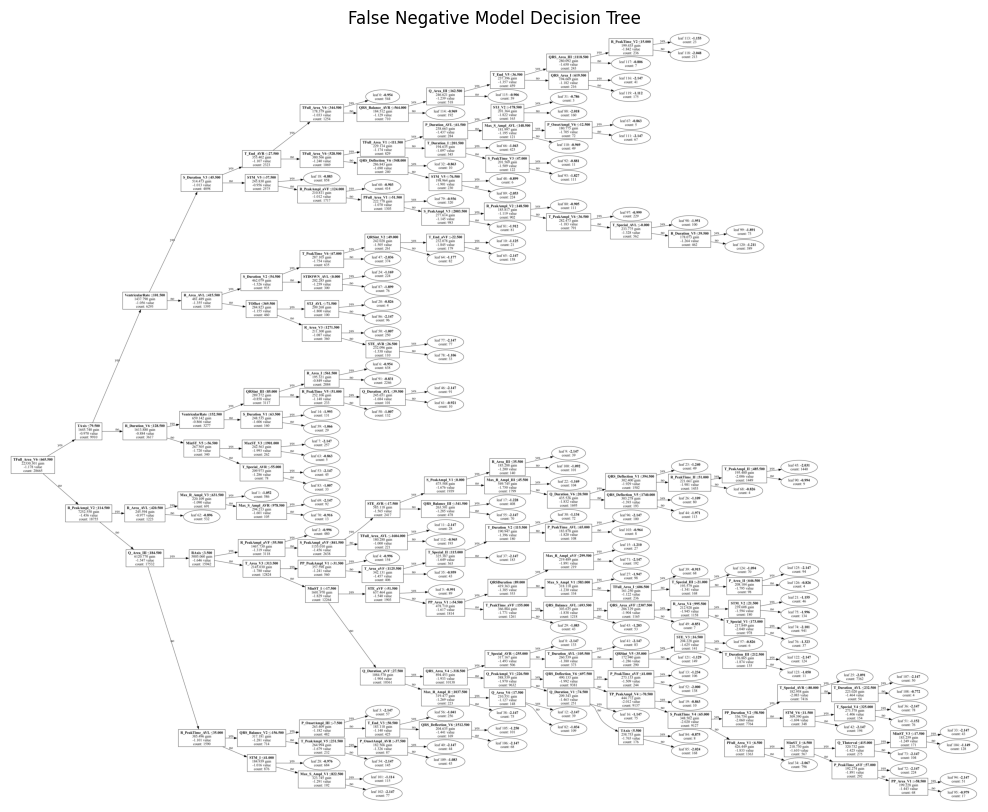

<Figure size 3000x2000 with 0 Axes>

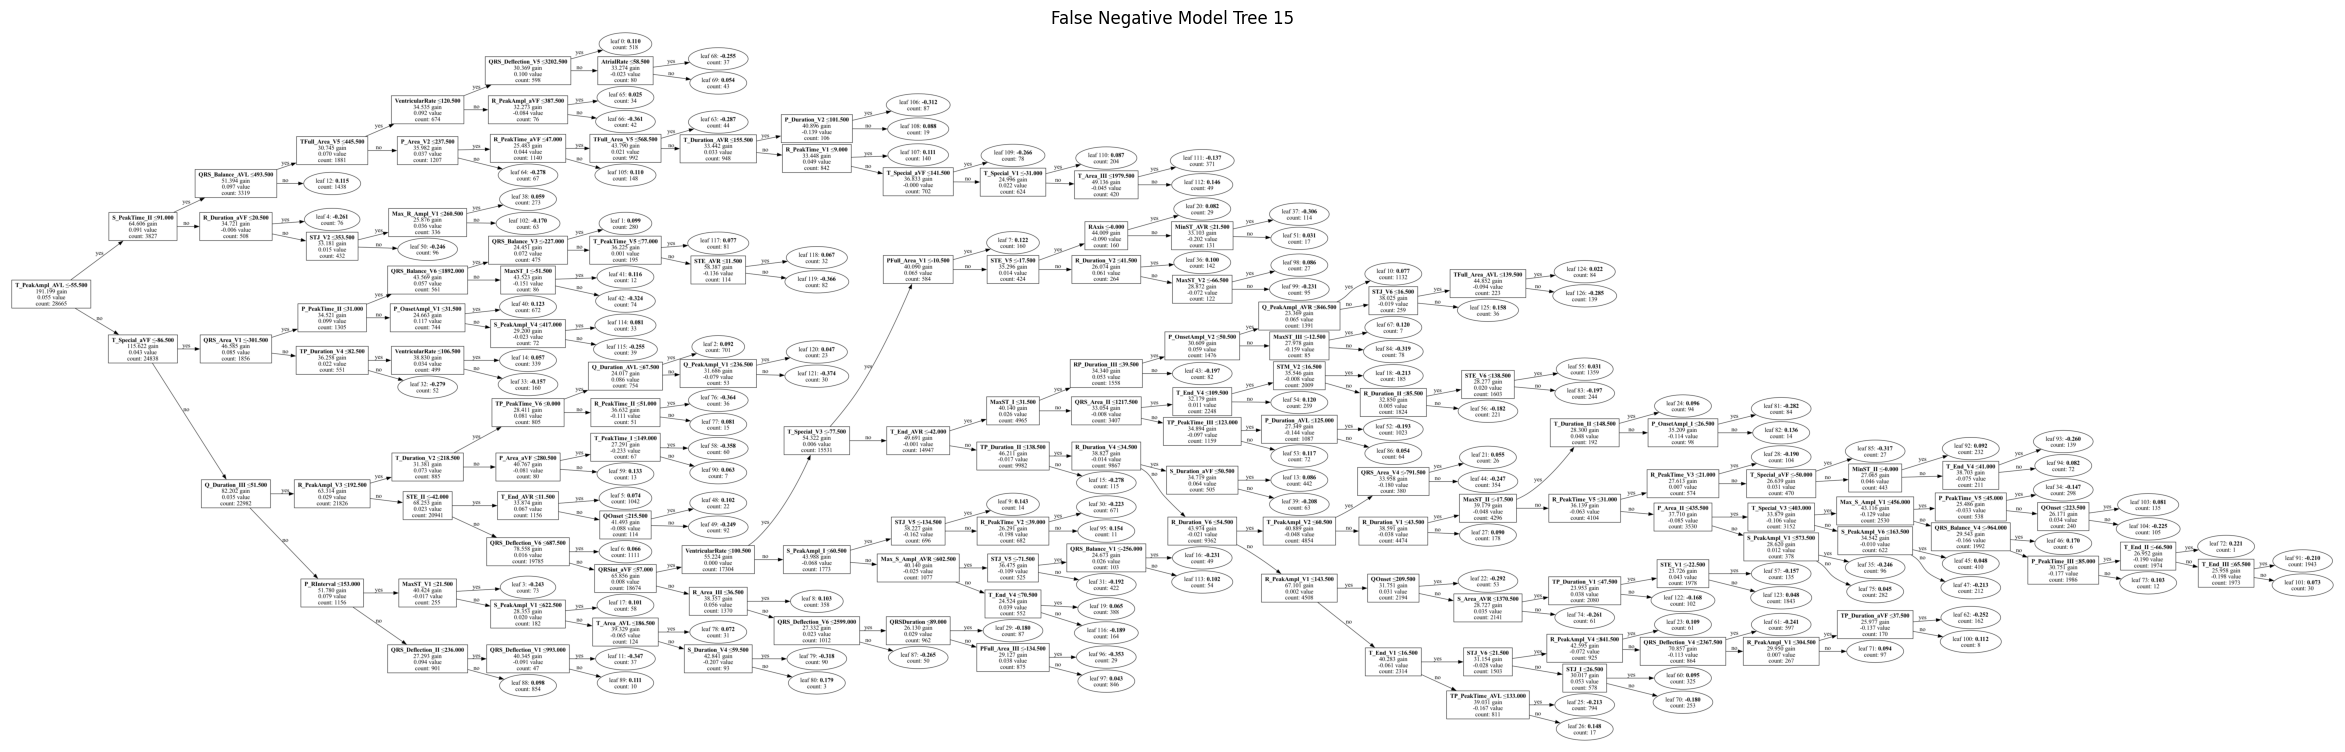

In [2]:
# Load false negative model
falneg_model = lgb.Booster(model_file="falneg.pkl")
info = ['split_gain', 'internal_value', 'internal_count', 'leaf_count', 'leaf_value']

# plot decision tree
plt.figure(figsize=(20, 10))
plot_tree(falneg_model, 
          tree_index=0, 
          figsize=(20, 10), 
          show_info=info)  
plt.title("False Negative Model Decision Tree")
plt.show()

# plot another tree, take tree 15 as example
plt.figure(figsize=(30, 20))
lgb.plot_tree(falneg_model, 
              tree_index=15, 
              figsize=(30, 20), 
              show_info=info)
plt.title("False Negative Model Tree 15")
plt.show()

False Positive Model
---

<Figure size 3000x2000 with 0 Axes>

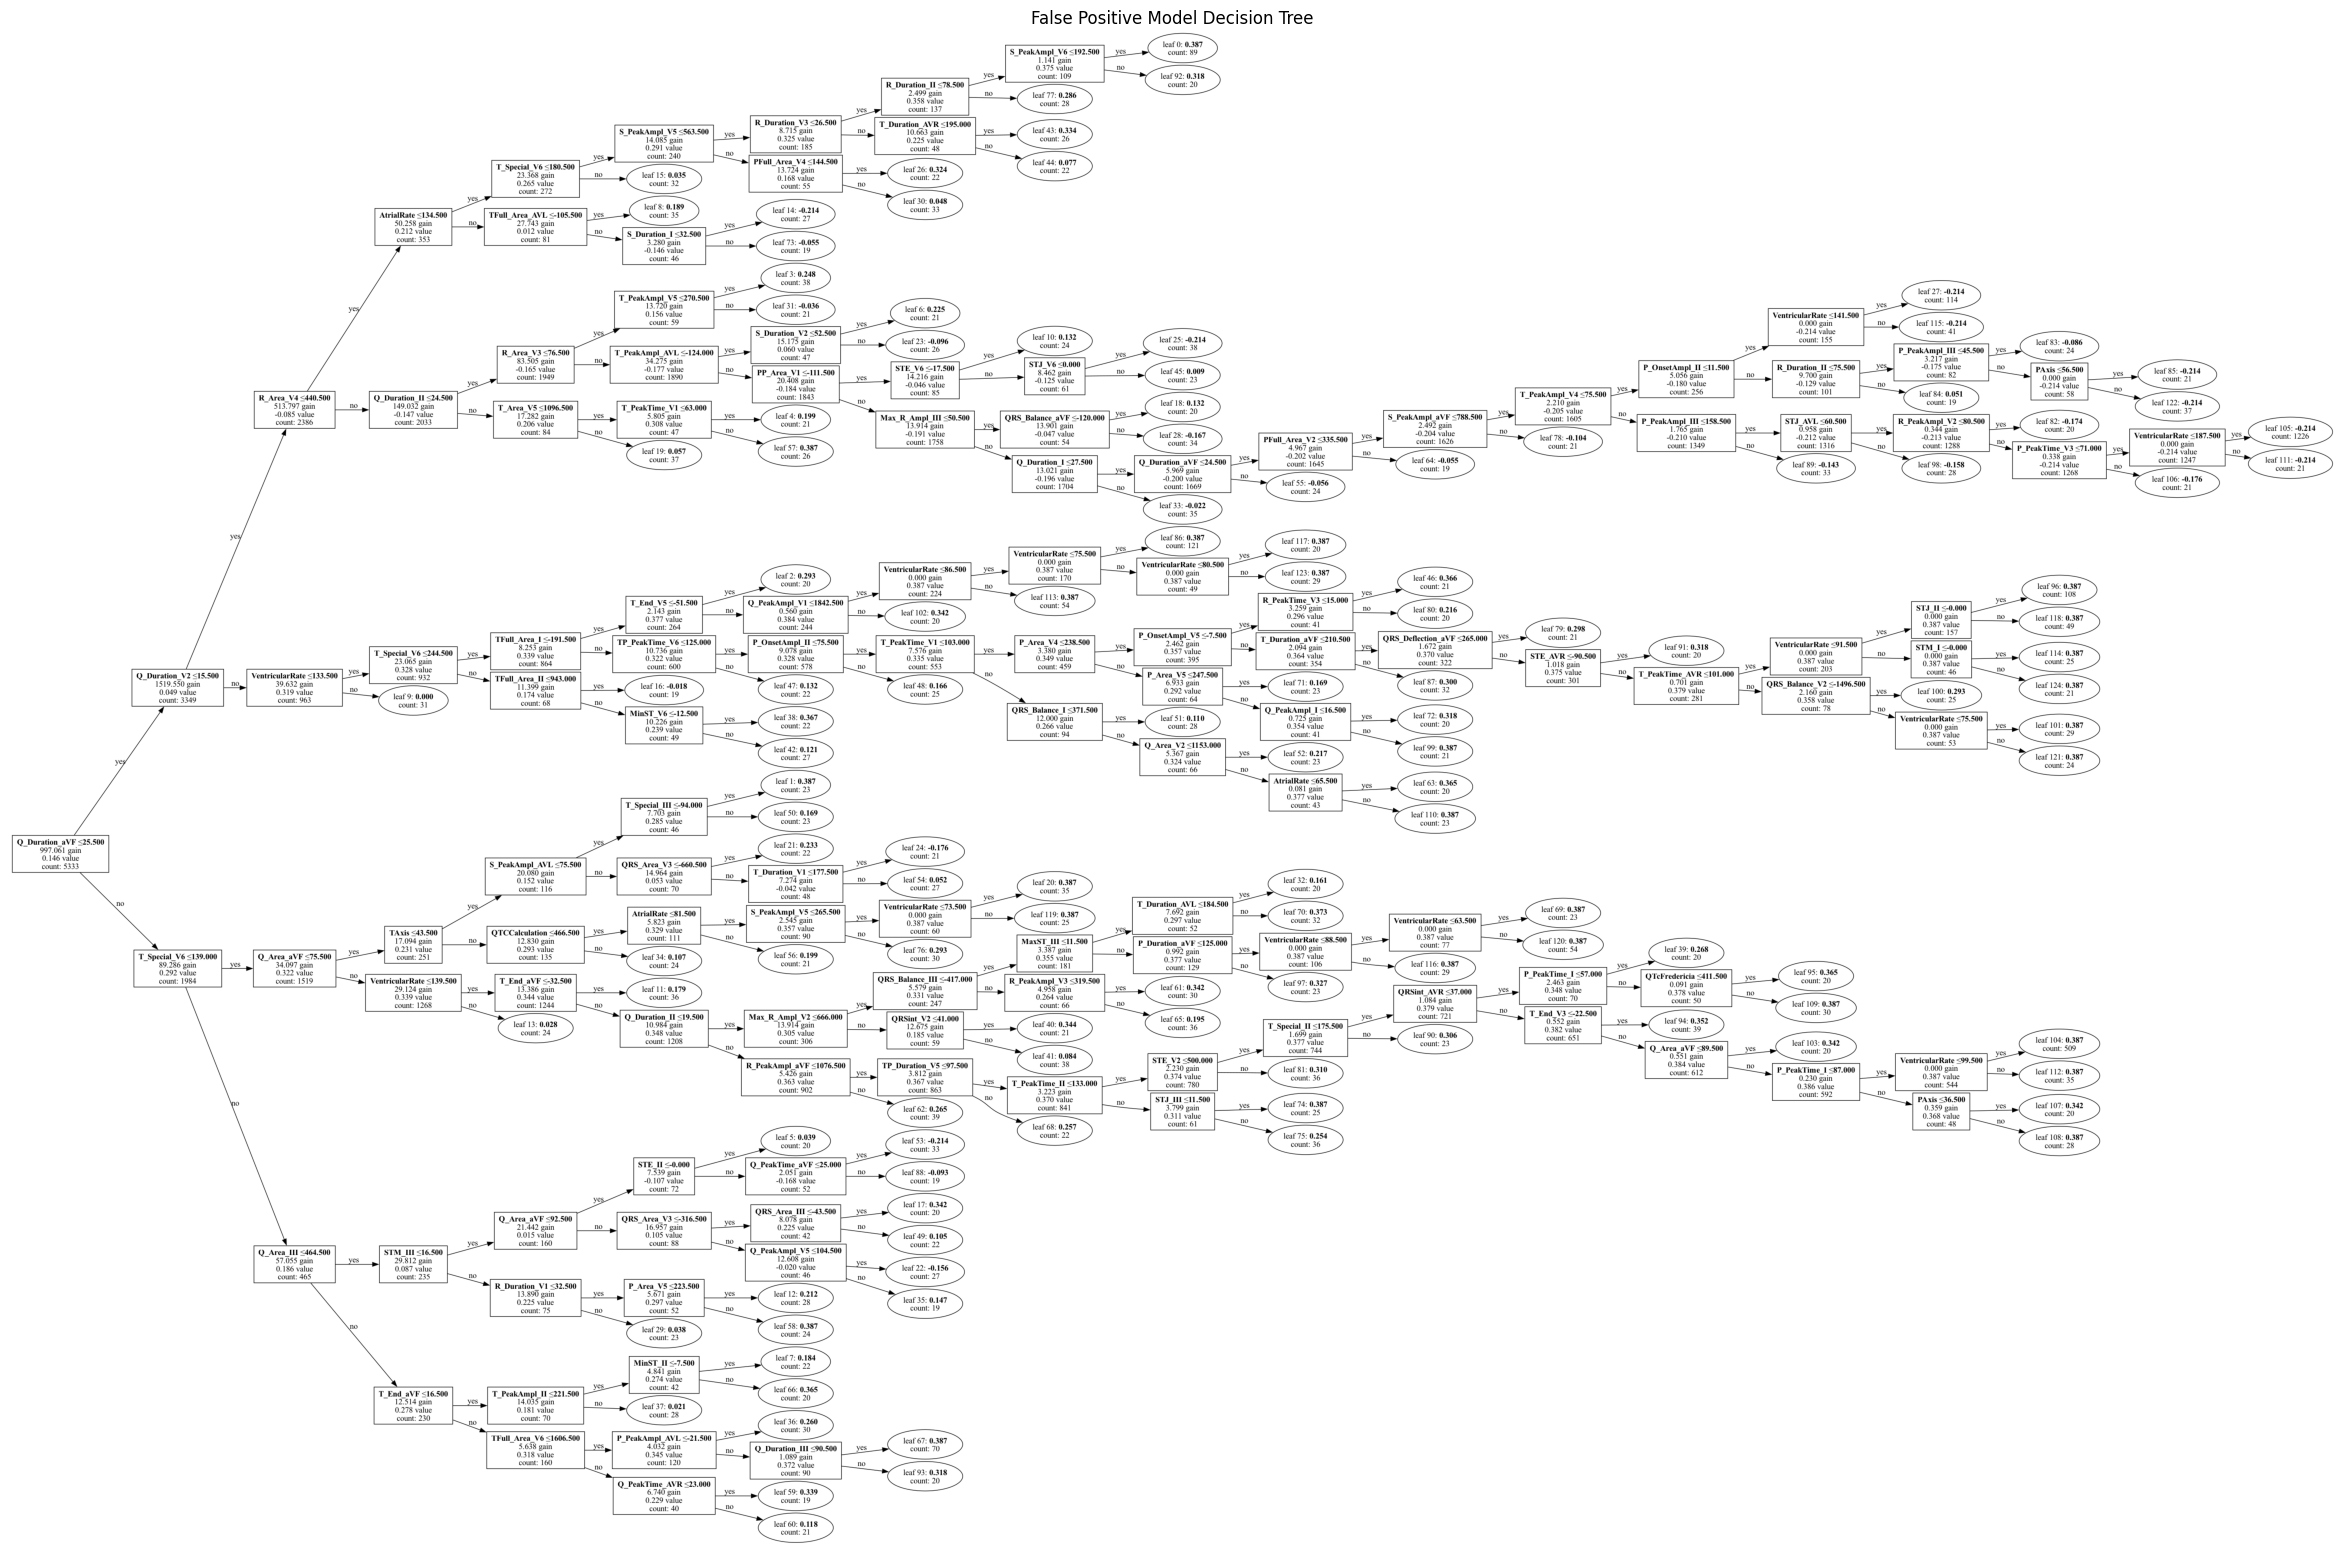

<Figure size 3000x2000 with 0 Axes>

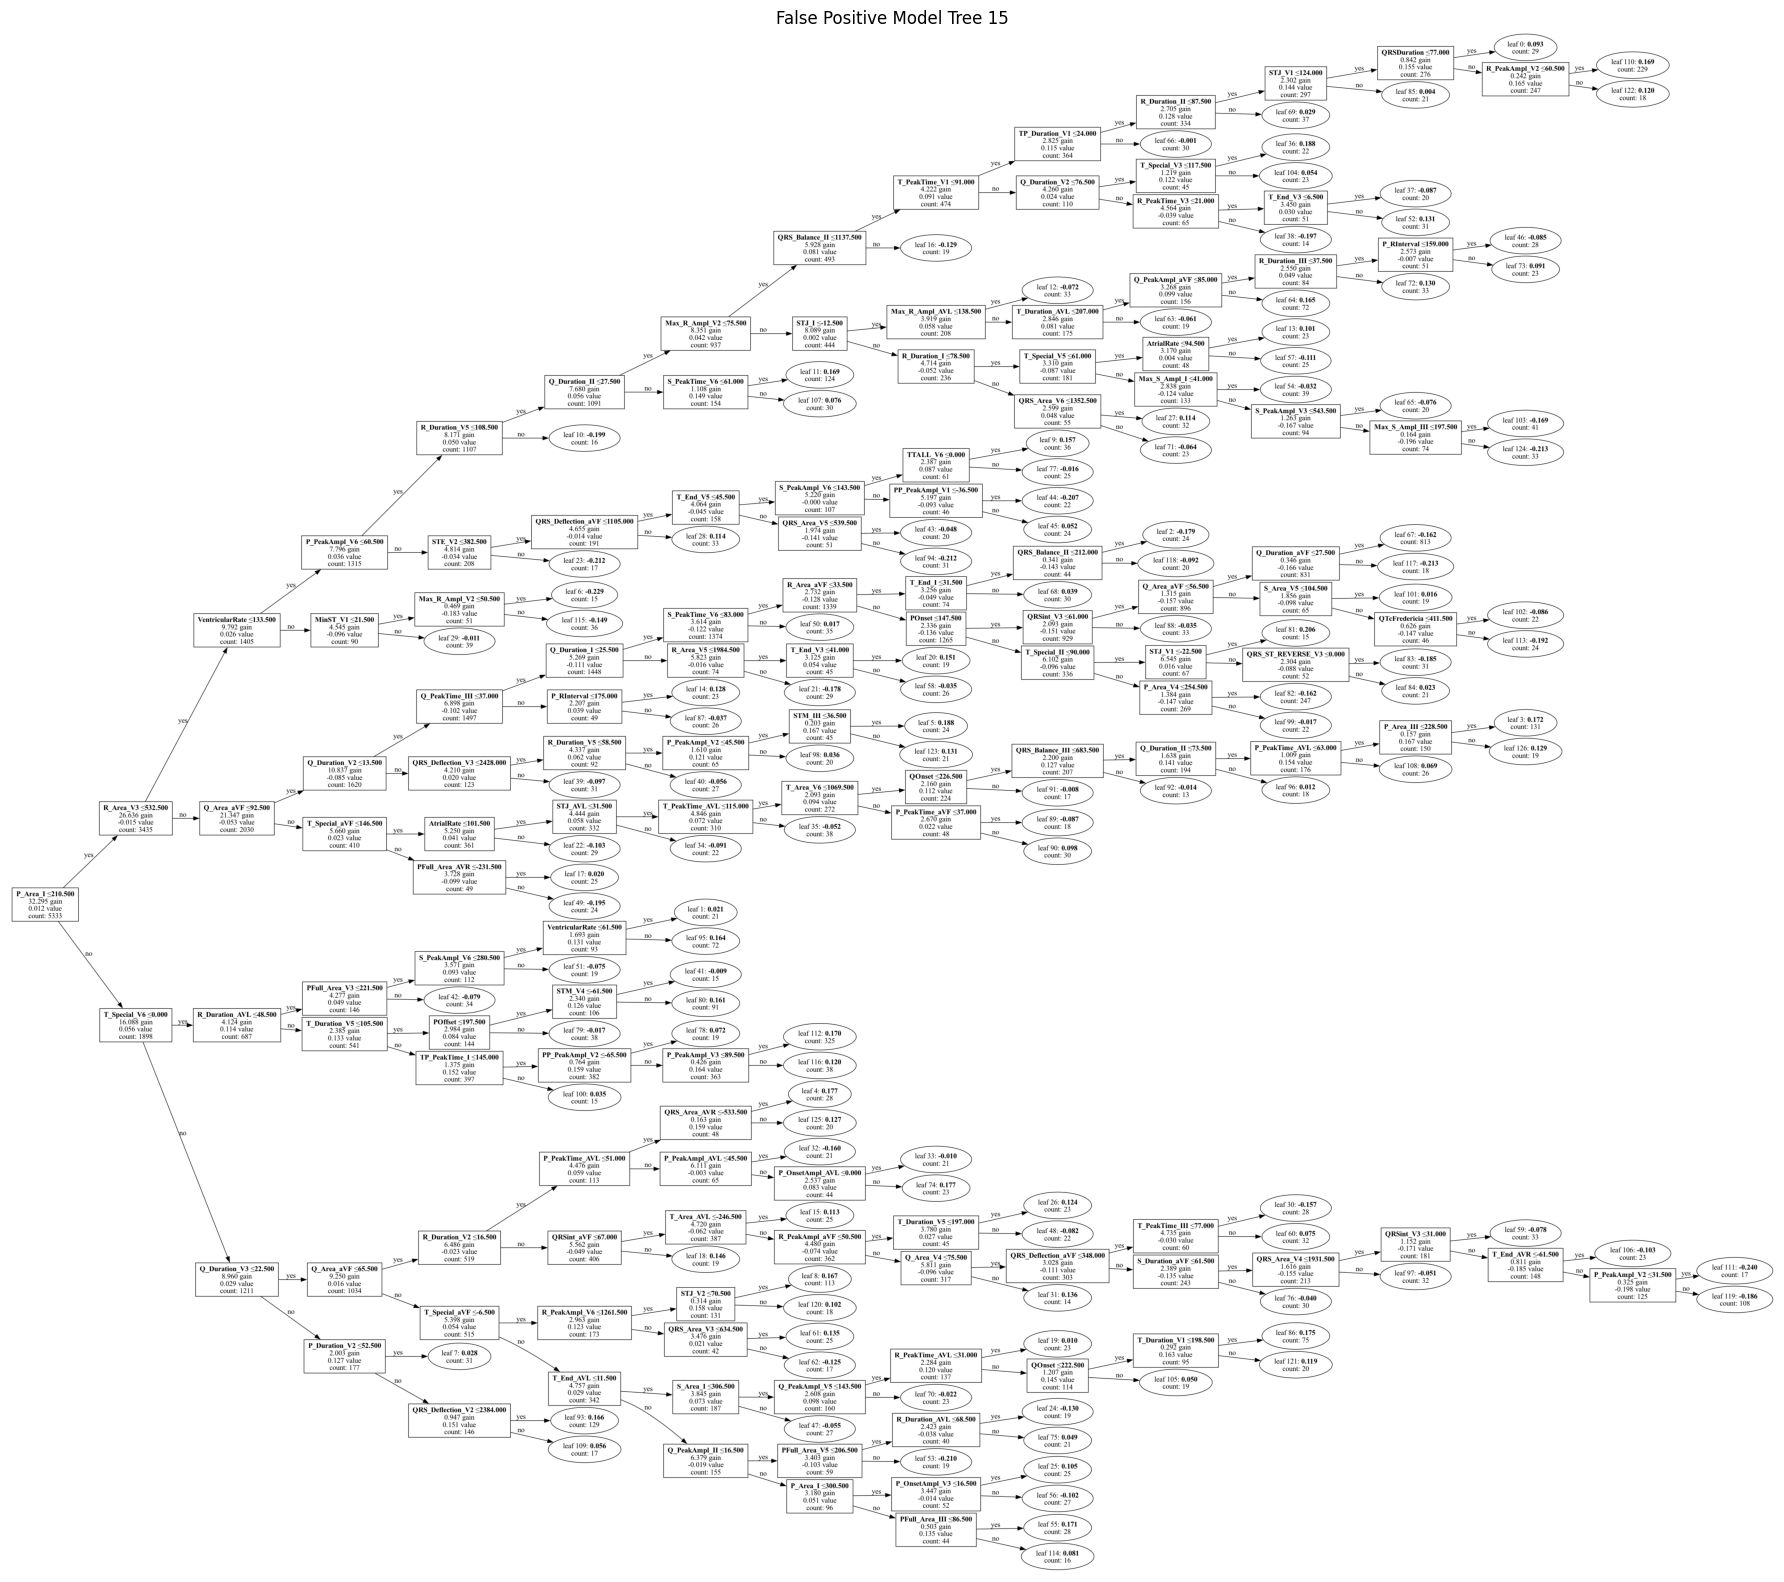

In [3]:
# Load false positive model
falpos_model = lgb.Booster(model_file="falpos.pkl")
info = ['split_gain', 'internal_value', 'internal_count', 'leaf_count', 'leaf_value']

# plot decision tree
plt.figure(figsize=(30, 20))
lgb.plot_tree(falpos_model, 
              tree_index=0, 
              figsize=(30, 20), 
              show_info=info)
plt.title("False Positive Model Decision Tree")
plt.show()

# plot another tree, take tree 15 as example
plt.figure(figsize=(30, 20))
lgb.plot_tree(falpos_model, 
              tree_index=15, 
              figsize=(30, 20), 
              show_info=info)
plt.title("False Positive Model Tree 15")
plt.show()

Visualize with Certain Patient ID
---

In [4]:
false_patients_path = os.path.join("false_patients")
temp_df = []

drop_cols =  ['PatientID', 
                '12SL_Codes', 
                'Phys_Codes',
                'TestID', 
                'Source', 
                'Gender',
                'PatientAge', 
                'AcquisitionDateTime_DT',
                'MI_Phys',
                'MI_12SL'] 

### False Negative

In [5]:
# read in false negative data 
temp_df = []
for filename in os.listdir(false_patients_path):
    if filename.startswith("false_negative"):
        file = os.path.join(false_patients_path, filename)
        df = pd.read_csv(file, skiprows=1)

        code = pd.read_csv(file, nrows=1).columns[0] 
        code = re.sub(r'\D', '', code) 
        df["Code"] = code

        temp_df.append(df)

falneg_df = pd.concat(temp_df, ignore_index=True)

In [ ]:
# take the first patient ID as an example
falneg_patient = falneg_df.iloc[0]["PatientID"]
falneg_patient

'HR00039'

In [7]:
# read dataset
falneg_data = pd.read_csv("negative.csv", na_values=['NULL'])
falneg_data['AcquisitionDateTime_DT'] = pd.to_datetime(falneg_data['AcquisitionDateTime_DT'])

data = falneg_data[falneg_data["PatientID"] == falneg_patient] 
X = data.drop(drop_cols, axis=1).reset_index(drop=True)

In [8]:
leaf_indices = falneg_model.predict(X, pred_leaf=True)
print("Leaf Indices: ", leaf_indices)

Leaf Indices:  [[ 17  57 113  37  83 120  80   0  11  16  53 107 100  91  20  12  94 116
    0   7 116  98  46 109   2  54  39 123  95  22 103   6  49  67  42  17
    6  92  37  95  22  65   1  98 121  16  45  33 112  52  11  50  65 126
   60  61 119  36 125   1 117  51  43  61  98  70  74  10  61 119  23  73
  118 124  35 118 107 126  14  23 126  63  65 125  84  60  66  84  71 126
    2  25  95 111 122  88 104   6 126  34  23  62  88   2 119  99   9 101
  108  70 106  65  31  40  42 101  94  29  97  41  47 106  20 126 111  85
   81 119 120  22  17  33  94  14  37 120 116  19  88 108  49  20   0 102
   92   5  72  36 122 108  71   0 116  16  46  23   0   4 102  19 124  41
  118  74   2   7  86  63  89  25  68   0  53  43  99  17  43  94  49  25
  125  37 118  73  17  92  56  41  12  64  72  33 101  35  40 125   8  30
   61 120]]


<Figure size 3000x2000 with 0 Axes>

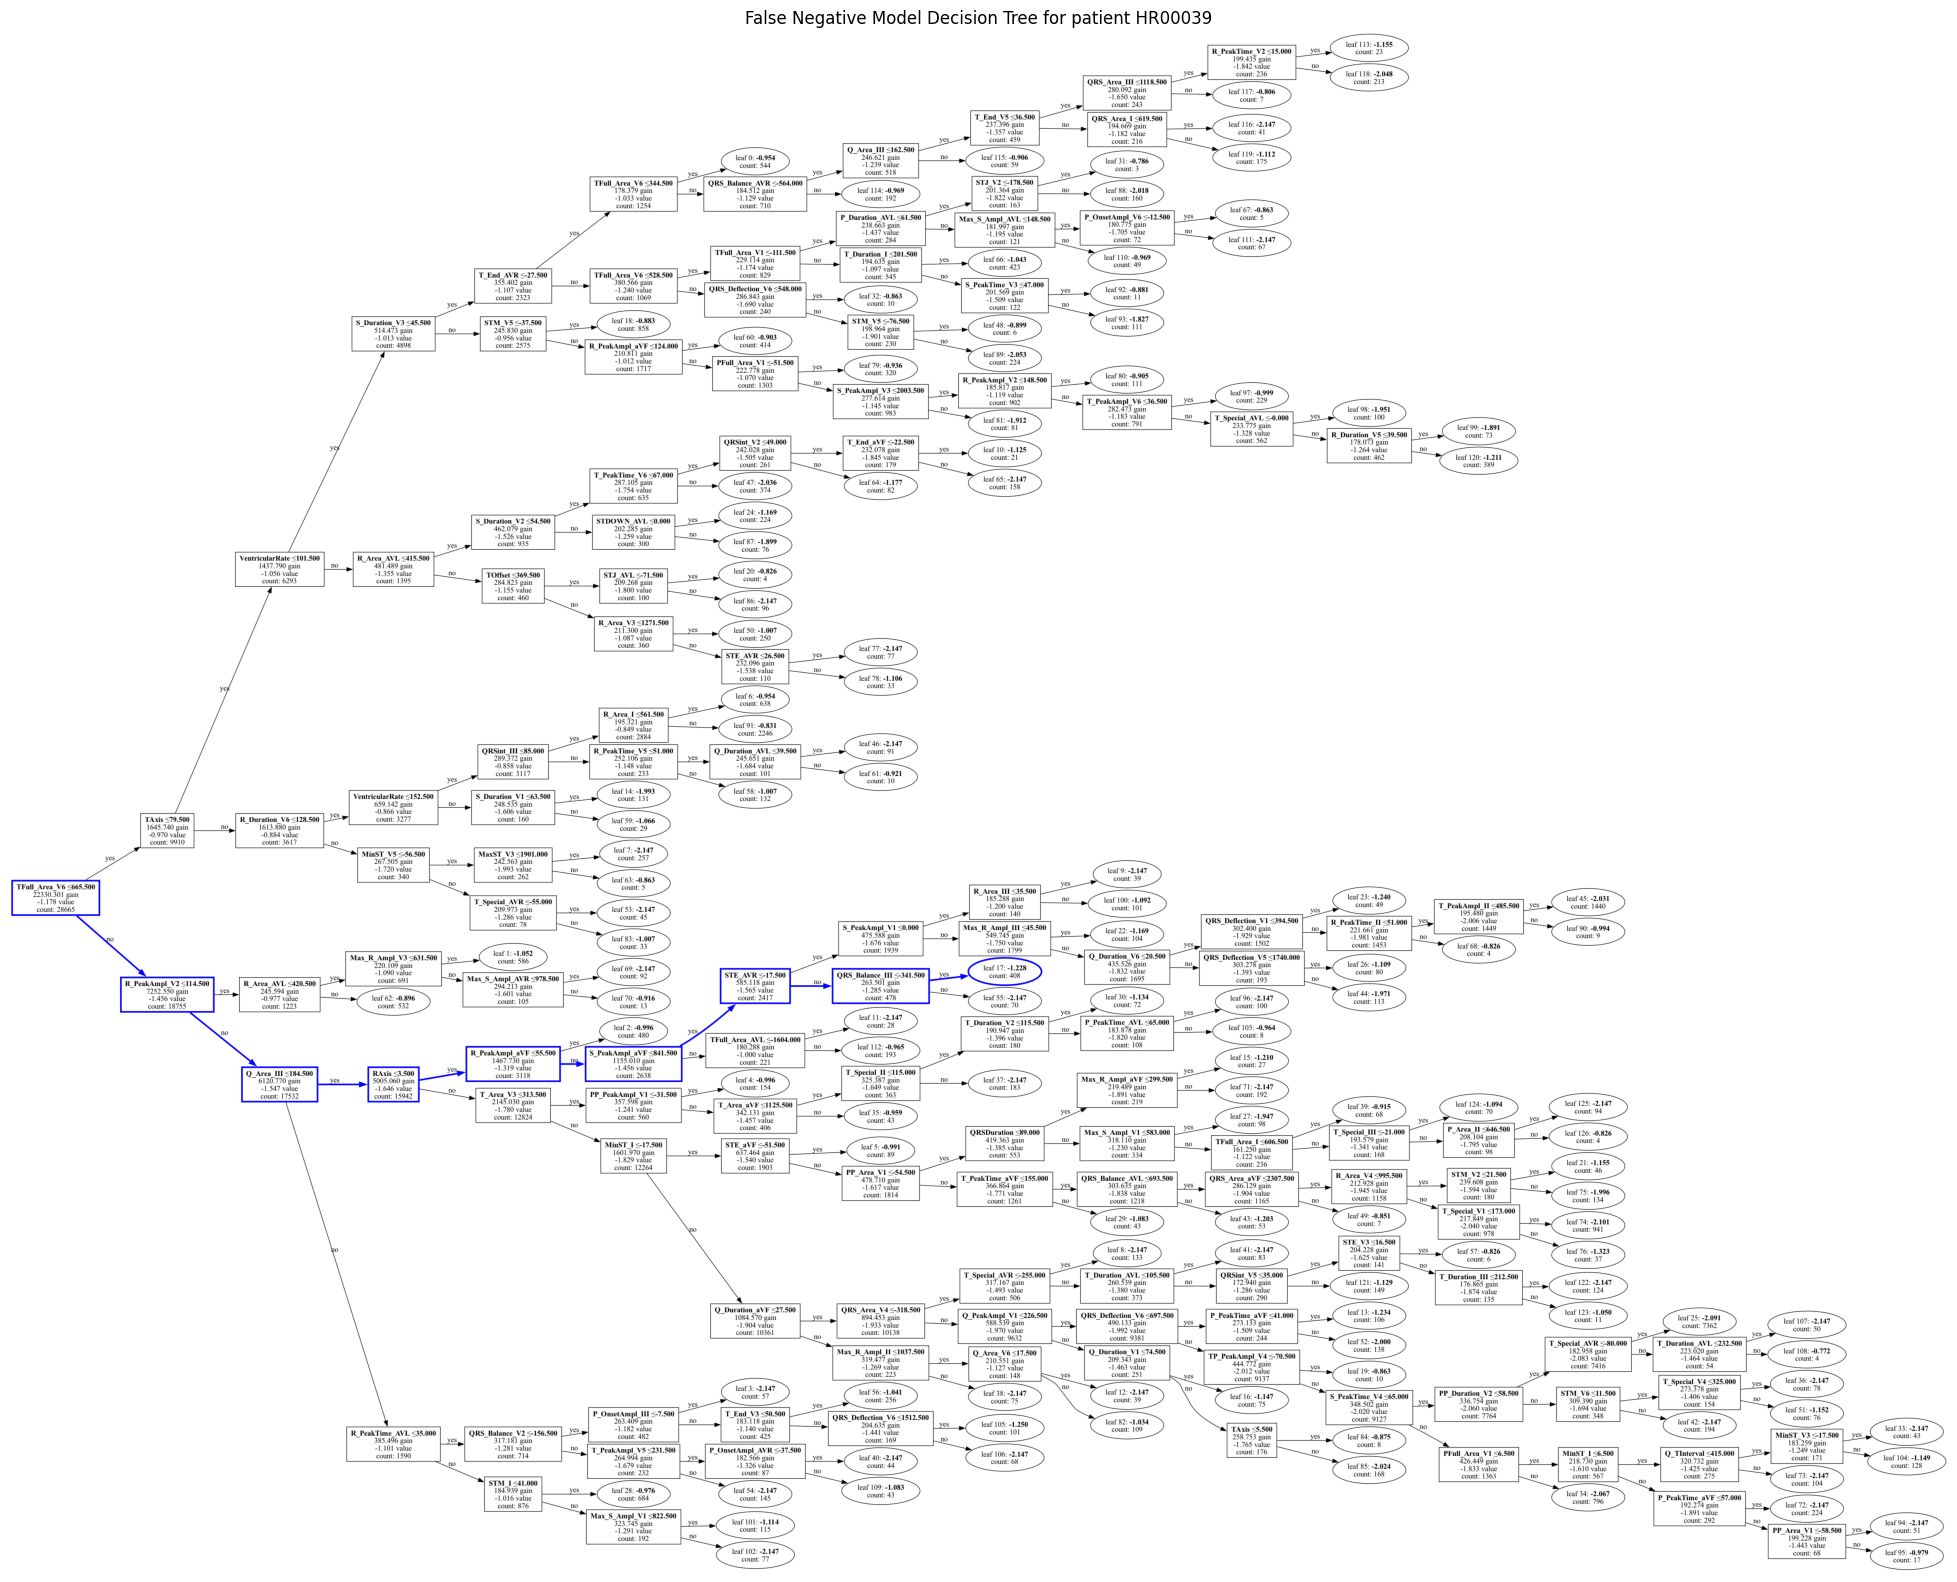

In [9]:
# plot decision tree for the patient
plt.figure(figsize=(30, 20))
lgb.plot_tree(falneg_model, 
              tree_index=0, 
              figsize=(30, 20), 
              show_info=info,
              example_case=X)
plt.title(f"False Negative Model Decision Tree for patient {falneg_patient}")
plt.show()

### False Positive

In [10]:
# read in false positive data 
temp_df = []
for filename in os.listdir(false_patients_path):
    if filename.startswith("false_positive"):
        print(filename)
        file = os.path.join(false_patients_path, filename)
        df = pd.read_csv(file, skiprows=1)

        code = pd.read_csv(file, nrows=1).columns[0] 
        code = re.sub(r'\D', '', code) 
        df["Code"] = code

        temp_df.append(df)

falpos_df = pd.concat(temp_df, ignore_index=True)

false_positive_59931005.csv
false_positive_164889003.csv
false_positive_164917005.csv
false_positive_426177001.csv
false_positive_427084000.csv
false_positive_164867002.csv
false_positive_426783006.csv
false_positive_55930002.csv
false_positive_164934002.csv
false_positive_164890007.csv


In [11]:
# take the first patient ID as an example
falpos_patient = falpos_df.iloc[0]["PatientID"]
falpos_patient

'HR12039'

In [12]:
# read dataset
falpos_data = pd.read_csv("positive.csv", na_values=['NULL'])
falpos_data['AcquisitionDateTime_DT'] = pd.to_datetime(falpos_data['AcquisitionDateTime_DT'])

data = falpos_data[falpos_data["PatientID"] == falpos_patient] 
X = data.drop(drop_cols, axis=1).reset_index(drop=True)

In [13]:
leaf_indices = falpos_model.predict(X, pred_leaf=True)
print("Leaf Indices: ", leaf_indices)

Leaf Indices:  [[ 92  53  99  54  24  61  62  47  64  97   4  22  84  33   1  78  23 103
   39  35  72  34 105  15  63  22  73  70  70  27 108  20 106 106  23   5
  124  63 101  47   0  83  98   1  15  88  13  26 108  53 120  12  61  32
  117 100 117  17   2  47  31  43  59   0  61 107  65  12  46  25   0  21
   66  57 121 117 102  46  16   0  16 124  76  34  91  83 109 115  28  61
    2  82  10  55  30  85  74  24  17  82  34  96 121  96  45 121 112  92
  108   0 117  15  81  64  52  45  44  30  77  39  83  28  94   7  60  89
   32  16  44  11  31   7  40  53  38   6  17  36   0  16  28  26  13   5
   30  29   9   3   9  26   7  19  21  12  16  28  17  14   0   2  15   3
    3   1  26  31   1  10   1   6   8  10   6   1  15   4   7  10   1  14
    7  12  21   2  17   4   7  10   8  12   1   7   6  10   4   2   7  13
   14  20]]


<Figure size 3000x2000 with 0 Axes>

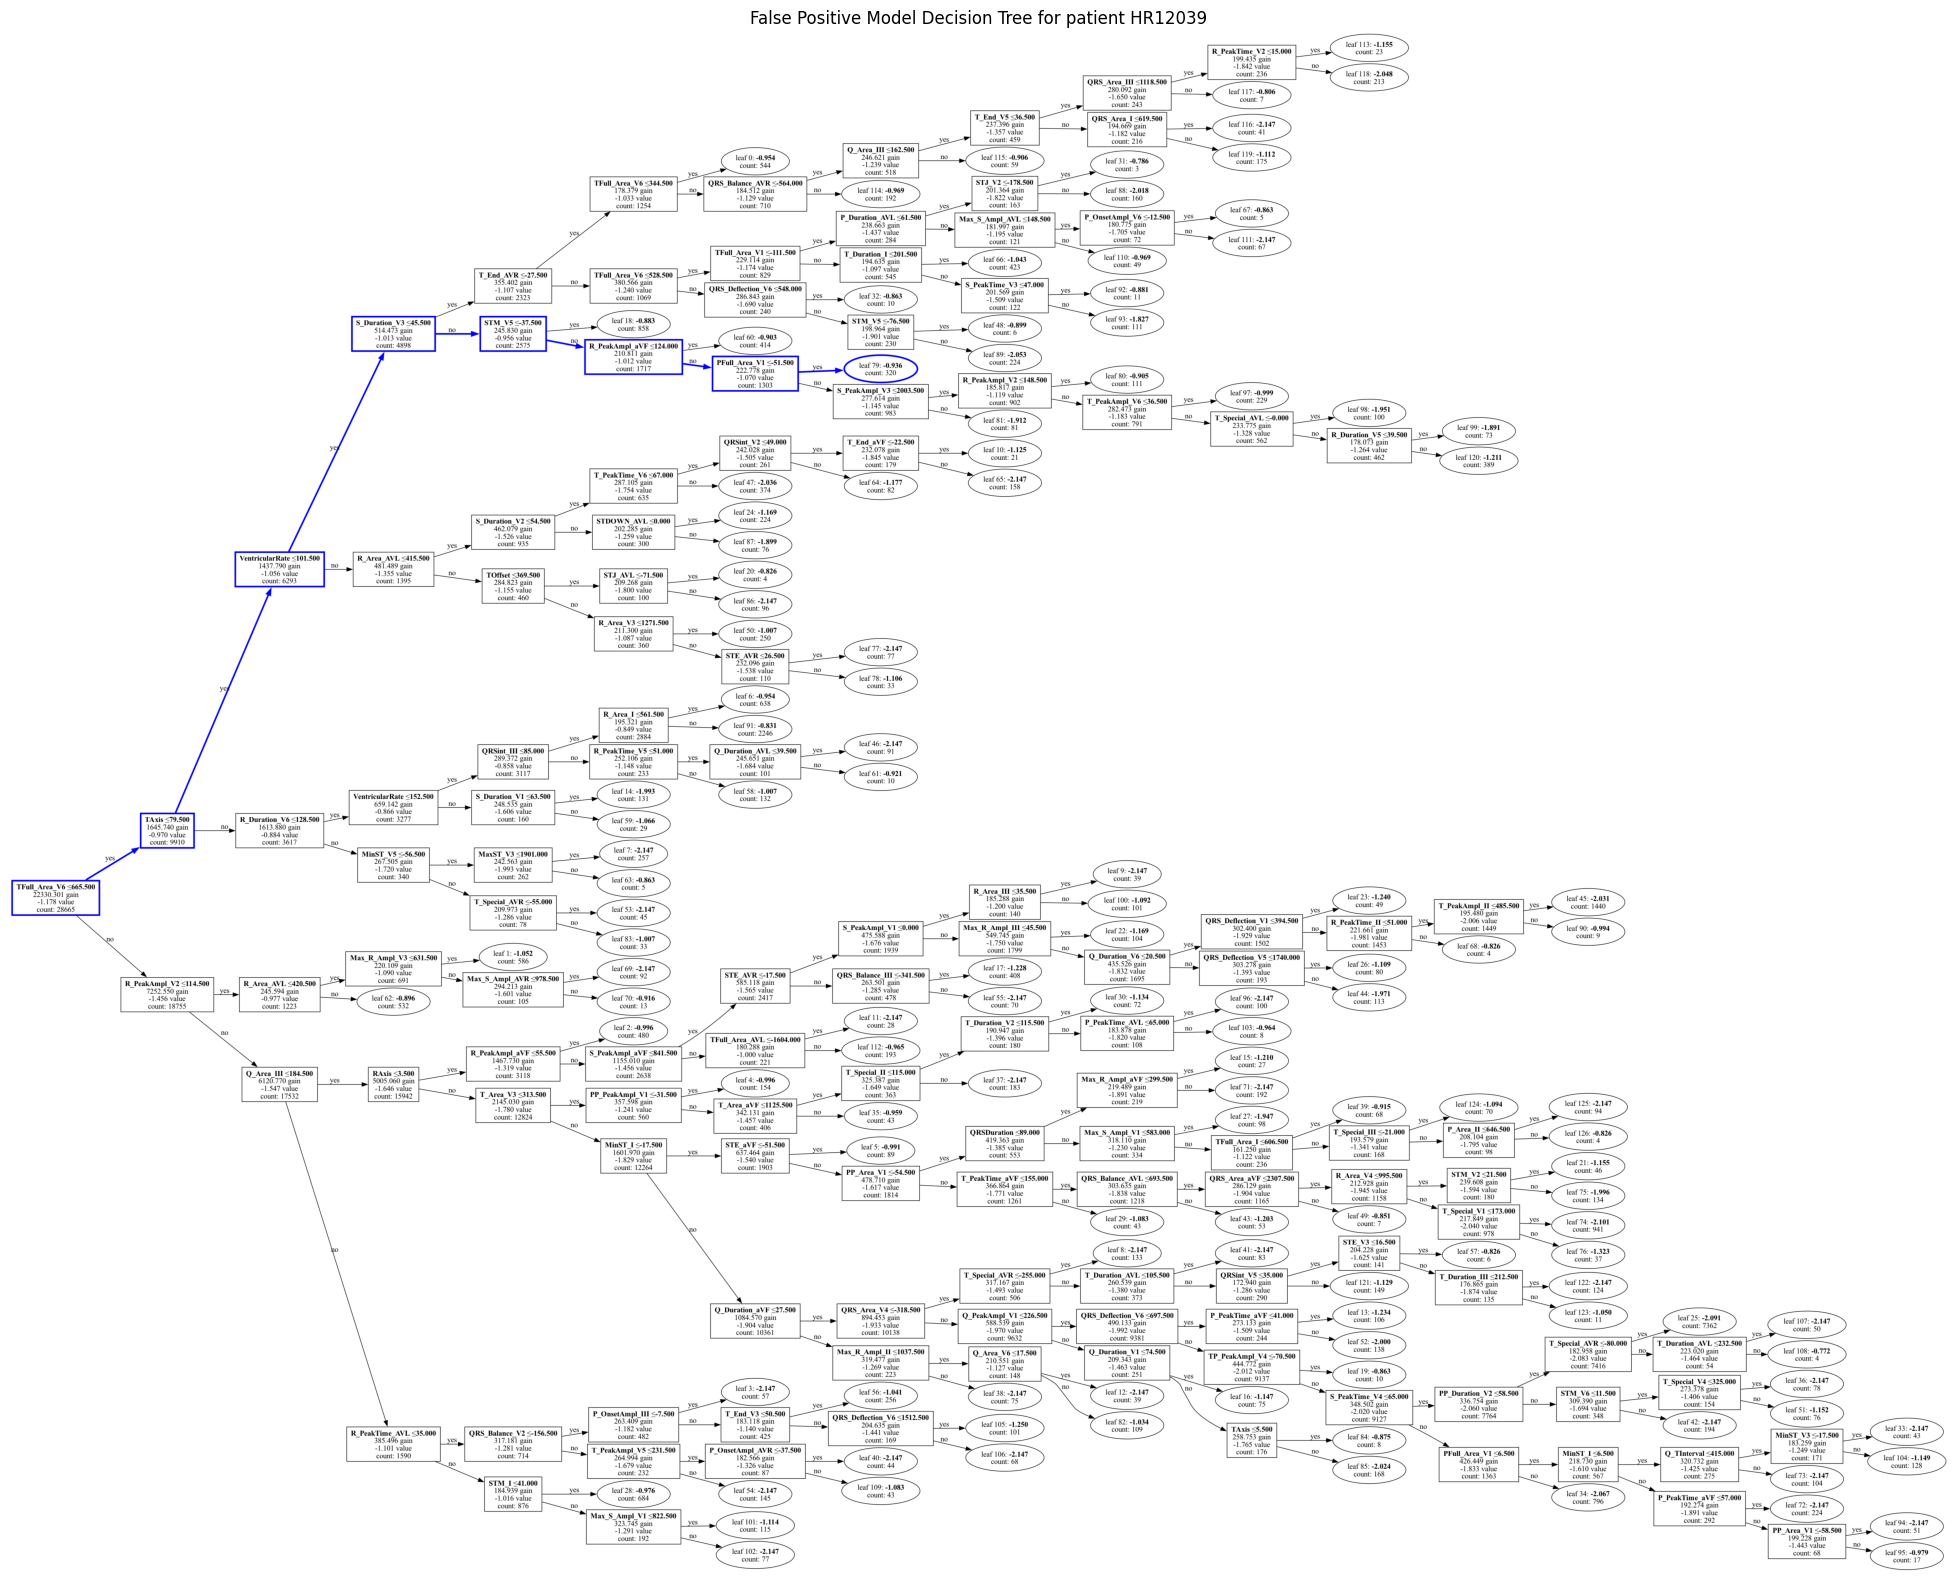

In [14]:
# plot decision tree for the patient
plt.figure(figsize=(30, 20))
lgb.plot_tree(falneg_model, 
              tree_index=0, 
              figsize=(30, 20), 
              show_info=info,
              example_case=X)
plt.title(f"False Positive Model Decision Tree for patient {falpos_patient}")
plt.show()